In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import os

In [3]:
os.chdir(r"E:\2025-QXF总文件夹\2025结果汇总\2025-07 原始数据\20250730 analysis SPR-C9_LC3B")      
os.getcwd()

'E:\\2025-QXF总文件夹\\2025结果汇总\\2025-07 原始数据\\20250730 analysis SPR-C9_LC3B'

检测到总列数: 24
警告：预期20列，实际检测到24列。请检查数据格式。
成功加载数据: 2978行 × 24列


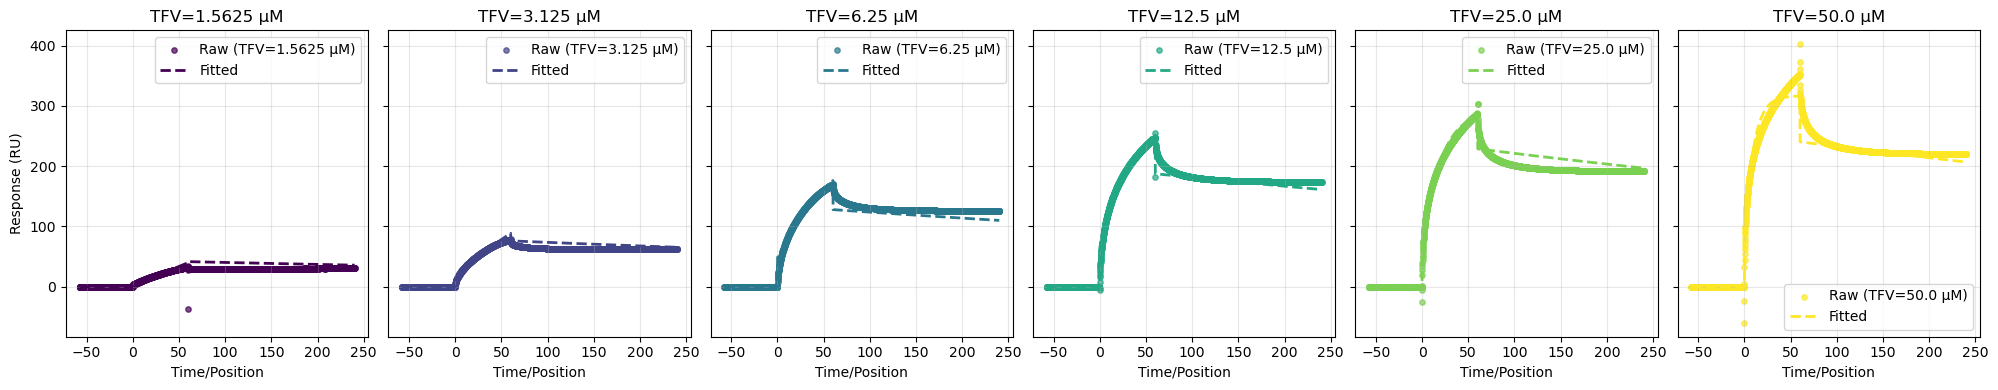

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import re

# 读取文件并处理编码问题
def read_file(filename):
    encodings = ['utf-8', 'gbk', 'latin1']  # 尝试的编码顺序
    for enc in encodings:
        try:
            with open(filename, 'r', encoding=enc) as f:
                lines = [line.strip() for line in f if line.strip()]
            return lines
        except UnicodeDecodeError:
            continue
    raise ValueError("无法解码文件，请检查文件编码")

lines = read_file('TFV-1 0618.txt')

# 解析列名
header = lines[0].split('\t')
num_columns = len(header)
print(f"检测到总列数: {num_columns}")

# 验证列数是否合理 (应为5个浓度×4列=20列)
if num_columns != 20:
    print(f"警告：预期20列，实际检测到{num_columns}列。请检查数据格式。")

# 提取浓度信息
cycles = []
tfv_values = []
for i in range(0, num_columns, 4):  # 每4列一个浓度
    col = header[i]
    match = re.search(r'Cycle: (\d+).*?TFV\s+([\d.]+)', col)
    if match:
        cycles.append(int(match.group(1)))
        tfv_values.append(float(match.group(2)))

# 处理数据行 - 更安全的方式
data = []
for line in lines[1:]:
    parts = line.split('\t')
    if len(parts) == num_columns:  # 只处理完整行
        try:
            row = [float(x) if x.strip() else np.nan for x in parts]
            data.append(row)
        except ValueError:
            print(f"忽略无法解析的行: {line[:50]}...")
            continue

data = np.array(data)
print(f"成功加载数据: {data.shape[0]}行 × {data.shape[1]}列")

# 组织数据结构
num_cycles = len(cycles)
cycle_data = {i: {'raw_x': [], 'raw_y': [], 'fitted_x': [], 'fitted_y': []} 
             for i in range(num_cycles)}

for i in range(num_cycles):
    raw_x_col = 4 * i
    raw_y_col = 4 * i + 1
    fitted_x_col = 4 * i + 2
    fitted_y_col = 4 * i + 3
    
    cycle_data[i]['raw_x'] = data[:, raw_x_col]
    cycle_data[i]['raw_y'] = data[:, raw_y_col]
    cycle_data[i]['fitted_x'] = data[:, fitted_x_col]
    cycle_data[i]['fitted_y'] = data[:, fitted_y_col]

# 可视化
fig, axs = plt.subplots(1, num_cycles, figsize=(20, 4), sharey=True)
if num_cycles == 1:
    axs = [axs]

colors = plt.cm.viridis(np.linspace(0, 1, num_cycles))

for i, color in enumerate(colors):
    ax = axs[i]
    cd = cycle_data[i]
    tfv = tfv_values[i]
    
    # 绘制数据（跳过NaN值）
    valid = ~np.isnan(cd['raw_y'])
    ax.scatter(np.array(cd['raw_x'])[valid], np.array(cd['raw_y'])[valid],
              s=15, alpha=0.7, color=color, label=f'Raw (TFV={tfv} µM)')
    
    valid = ~np.isnan(cd['fitted_y'])
    ax.plot(np.array(cd['fitted_x'])[valid], np.array(cd['fitted_y'])[valid],
           '--', linewidth=2, color=color, label='Fitted')
    
    ax.set_xlabel('Time/Position')
    if i == 0:
        ax.set_ylabel('Response (RU)')
    ax.set_title(f'TFV={tfv} μM')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('spr_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

检测到总列数: 24
成功加载数据: 2978行 × 24列


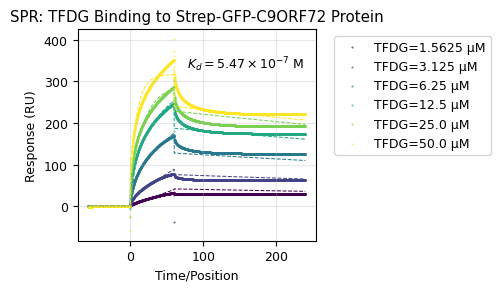

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import re


# 读取文件并处理编码问题
def read_file(filename):
    encodings = ['utf-8', 'gbk', 'latin1']  # 尝试的编码顺序
    for enc in encodings:
        try:
            with open(filename, 'r', encoding=enc) as f:
                lines = [line.strip() for line in f if line.strip()]
            return lines
        except UnicodeDecodeError:
            continue
    raise ValueError("无法解码文件，请检查文件编码")

lines = read_file('TFV-1 0618.txt')

# 解析列名
header = lines[0].split('\t')
num_columns = len(header)
print(f"检测到总列数: {num_columns}")

# 提取浓度信息
cycles = []
tfv_values = []
for i in range(0, num_columns, 4):  # 每4列一个浓度
    col = header[i]
    match = re.search(r'Cycle: (\d+).*?TFDG\s+([\d.]+)', col)
    if match:
        cycles.append(int(match.group(1)))
        tfv_values.append(float(match.group(2)))

# 处理数据行
data = []
for line in lines[1:]:
    parts = line.split('\t')
    if len(parts) == num_columns:  # 只处理完整行
        try:
            row = [float(x) if x.strip() else np.nan for x in parts]
            data.append(row)
        except ValueError:
            print(f"忽略无法解析的行: {line[:50]}...")
            continue

data = np.array(data)
print(f"成功加载数据: {data.shape[0]}行 × {data.shape[1]}列")

# 组织数据结构
num_cycles = len(cycles)
cycle_data = {i: {'raw_x': [], 'raw_y': [], 'fitted_x': [], 'fitted_y': []} 
             for i in range(num_cycles)}

for i in range(num_cycles):
    raw_x_col = 4 * i
    raw_y_col = 4 * i + 1
    fitted_x_col = 4 * i + 2
    fitted_y_col = 4 * i + 3
    
    cycle_data[i]['raw_x'] = data[:, raw_x_col]
    cycle_data[i]['raw_y'] = data[:, raw_y_col]
    cycle_data[i]['fitted_x'] = data[:, fitted_x_col]
    cycle_data[i]['fitted_y'] = data[:, fitted_y_col]

# 创建单个图形
plt.figure(figsize=(5, 3))
colors = plt.cm.viridis(np.linspace(0, 1, num_cycles))
plt.rcParams.update({'font.size': 9})  # 设置全局基础字体大小

# 绘制所有数据在同一图中
for i, color in enumerate(colors):
    cd = cycle_data[i]
    tfv = tfv_values[i]
    
    # 绘制原始数据（跳过NaN值）
    valid = ~np.isnan(cd['raw_y'])
    plt.scatter(np.array(cd['raw_x'])[valid], np.array(cd['raw_y'])[valid],
               s=0.25, alpha=0.7, color=color, 
               label=f'TFDG={tfv} µM')
    
    # 绘制拟合曲线（跳过NaN值）
    valid = ~np.isnan(cd['fitted_y'])
    plt.plot(np.array(cd['fitted_x'])[valid], np.array(cd['fitted_y'])[valid],
            '--', linewidth=0.75, color=color)
#plt.plot(np.array(cd['fitted_x'])[valid], np.array(cd['fitted_y'])[valid],
#            '--', linewidth=0.75, color=color,label=f'Fitted (TFV={tfv} µM)')


# 添加图例和标签
plt.xlabel('Time/Position')
plt.ylabel('Response (RU)')
plt.title('SPR: TFDG Binding to Strep-GFP-C9ORF72 Protein')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # 将图例放在图外右侧
plt.grid(True, alpha=0.3)
# 在plt.legend()之后添加以下代码
plt.text(0.95, 0.88, r'$K_d = 5.47 \times 10^{-7}$ M',  # 使用LaTeX格式
         ha='right', va='top', transform=plt.gca().transAxes,
         fontsize=9,
         bbox=dict(facecolor='white', alpha=0.3, edgecolor='none', boxstyle='round,pad=0.2'))
plt.tight_layout()

# 保存TIFF（使用Pillow参数）
plt.savefig('spr_combined_TFV2.tiff',
           format='tiff',
           dpi=600,
           bbox_inches='tight',
           pil_kwargs={'compression': 'tiff_lzw'})  # 正确参数传递方式

检测到总列数: 16
完整列名列表: ['Cycle: 26  SenoA  0.78125 礛_X', 'Cycle: 26  SenoA  0.78125 礛_Y', 'Cycle: 27  SenoA  1.5625 礛_X', 'Cycle: 27  SenoA  1.5625 礛_Y', 'Cycle: 28  SenoA  3.125 礛_X', 'Cycle: 28  SenoA  3.125 礛_Y', 'Cycle: 29  SenoA  6.25 礛_X', 'Cycle: 29  SenoA  6.25 礛_Y', 'Cycle: 30  SenoA  12.5 礛_X', 'Cycle: 30  SenoA  12.5 礛_Y', 'Cycle: 31  SenoA  25 礛_X', 'Cycle: 31  SenoA  25 礛_Y', 'Cycle: 32  SenoA  50 礛_X', 'Cycle: 32  SenoA  50 礛_Y', 'Cycle: 33  SenoA  100 礛_X', 'Cycle: 33  SenoA  100 礛_Y']
成功解析: Cycle: 26  SenoA  0.78125 礛_X -> 浓度=0.78125 µM
成功解析: Cycle: 27  SenoA  1.5625 礛_X -> 浓度=1.5625 µM
成功解析: Cycle: 28  SenoA  3.125 礛_X -> 浓度=3.125 µM
成功解析: Cycle: 29  SenoA  6.25 礛_X -> 浓度=6.25 µM
成功解析: Cycle: 30  SenoA  12.5 礛_X -> 浓度=12.5 µM
成功解析: Cycle: 31  SenoA  25 礛_X -> 浓度=25 µM
成功解析: Cycle: 32  SenoA  50 礛_X -> 浓度=50 µM
成功解析: Cycle: 33  SenoA  100 礛_X -> 浓度=100 µM
解析到 8 个浓度值: [0.78125, 1.5625, 3.125, 6.25, 12.5, 25.0, 50.0, 100.0]
成功加载数据: 2378行 × 16列
浓度 0.78125 µM: 2378 个有效点 (100.00

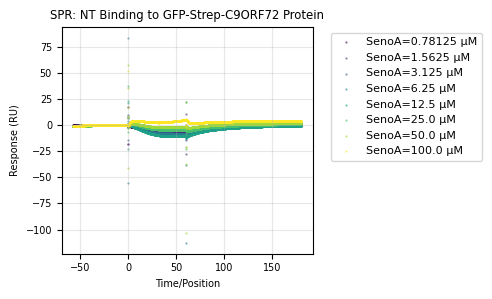

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import re

# 读取文件并处理编码问题
def read_file(filename):
    encodings = ['utf-8', 'gbk', 'latin1']  # 尝试的编码顺序
    for enc in encodings:
        try:
            with open(filename, 'r', encoding=enc) as f:
                lines = [line.strip() for line in f if line.strip()]
            return lines
        except UnicodeDecodeError:
            continue
    raise ValueError("无法解码文件，请检查文件编码")

# 读取文件
filename = 'senoa 0618.txt'
lines = read_file(filename)

# 解析列名
header = lines[0].split('\t')
num_columns = len(header)
print(f"检测到总列数: {num_columns}")
print(f"完整列名列表: {header}")  # 打印所有列名用于调试

# 提取浓度信息 - 终极版正则表达式
cycles = []
concentrations = []
for i in range(0, num_columns, 2):  # 每2列一个浓度
    col = header[i]
    # 关键改进：
    # 1. \s*匹配任意数量空格
    # 2. 明确匹配"礛_X"或"礛_Y"
    # 3. 浓度值支持多位小数
    match = re.search(r'Cycle:\s*(\d+)\s+SenoA\s+([\d.]+)\s+礛_[XY]', col)
    if match:
        cycles.append(int(match.group(1)))
        concentrations.append(float(match.group(2)))
        print(f"成功解析: {col} -> 浓度={match.group(2)} µM")
    else:
        print(f"警告：无法解析列名 '{col}'，正则表达式匹配失败")

print(f"解析到 {len(concentrations)} 个浓度值: {concentrations}")

# 处理数据行
data = []
for line in lines[1:]:
    parts = line.split('\t')
    if len(parts) == num_columns:  # 只处理完整行
        try:
            row = [float(x) if x.strip() else np.nan for x in parts]
            data.append(row)
        except ValueError:
            print(f"忽略无法解析的行: {line[:50]}...")
            continue

data = np.array(data)
print(f"成功加载数据: {data.shape[0]}行 × {data.shape[1]}列")

# 组织数据结构
num_cycles = len(cycles)
cycle_data = {i: {'x': [], 'y': []} for i in range(num_cycles)}

# 检查数据有效性
valid_data_count = 0
for i in range(num_cycles):
    x_col = 2 * i
    y_col = 2 * i + 1
    
    # 提取数据并检查NaN比例
    cycle_data[i]['x'] = data[:, x_col]
    cycle_data[i]['y'] = data[:, y_col]
    
    y_data = cycle_data[i]['y']
    valid = ~np.isnan(y_data)
    valid_count = np.sum(valid)
    valid_ratio = valid_count / len(y_data) * 100
    
    print(f"浓度 {concentrations[i]} µM: {valid_count} 个有效点 ({valid_ratio:.2f}%)")
    if valid_count > 0:
        valid_data_count += 1

if valid_data_count == 0:
    raise ValueError("所有浓度组均无有效数据，无法绘图")

# 创建单个图形
plt.figure(figsize=(5, 3))
colors = plt.cm.viridis(np.linspace(0, 1, num_cycles))
plt.rcParams.update({'font.size': 7})  # 设置全局基础字体大小

# 绘制所有数据并记录有效绘图的浓度
plotted_concentrations = []
for i, color in enumerate(colors):
    cd = cycle_data[i]
    conc = concentrations[i]
    
    # 绘制原始数据（跳过NaN值）
    valid = ~np.isnan(cd['y'])
    x_valid = np.array(cd['x'])[valid]
    y_valid = np.array(cd['y'])[valid]
    
    if len(x_valid) > 0:
        # 绘制散点图并设置标签
        scatter = plt.scatter(x_valid, y_valid,
                   s=0.25, alpha=0.7, color=color, 
                   label=f'SenoA={conc} µM')
        plotted_concentrations.append(conc)
    else:
        print(f"警告：浓度 {conc} µM 无有效数据，跳过绘图")

# 仅当有有效绘图时添加图例
if plotted_concentrations:
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
else:
    print("警告：无有效数据可绘制，图例已跳过")

# 添加标签和标题
plt.xlabel('Time/Position')
plt.ylabel('Response (RU)')
plt.title('SPR: NT Binding to GFP-Strep-C9ORF72 Protein')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# 保存图片并显示
save_path = 'spr_combined_SenoA_final.tiff'
plt.savefig(save_path,
           format='tiff',
           dpi=600,
           bbox_inches='tight',
           pil_kwargs={'compression': 'tiff_lzw'})
print(f"图片已保存至: {save_path}")

plt.show()

检测到总列数: 20
成功加载数据: 2378行 × 20列


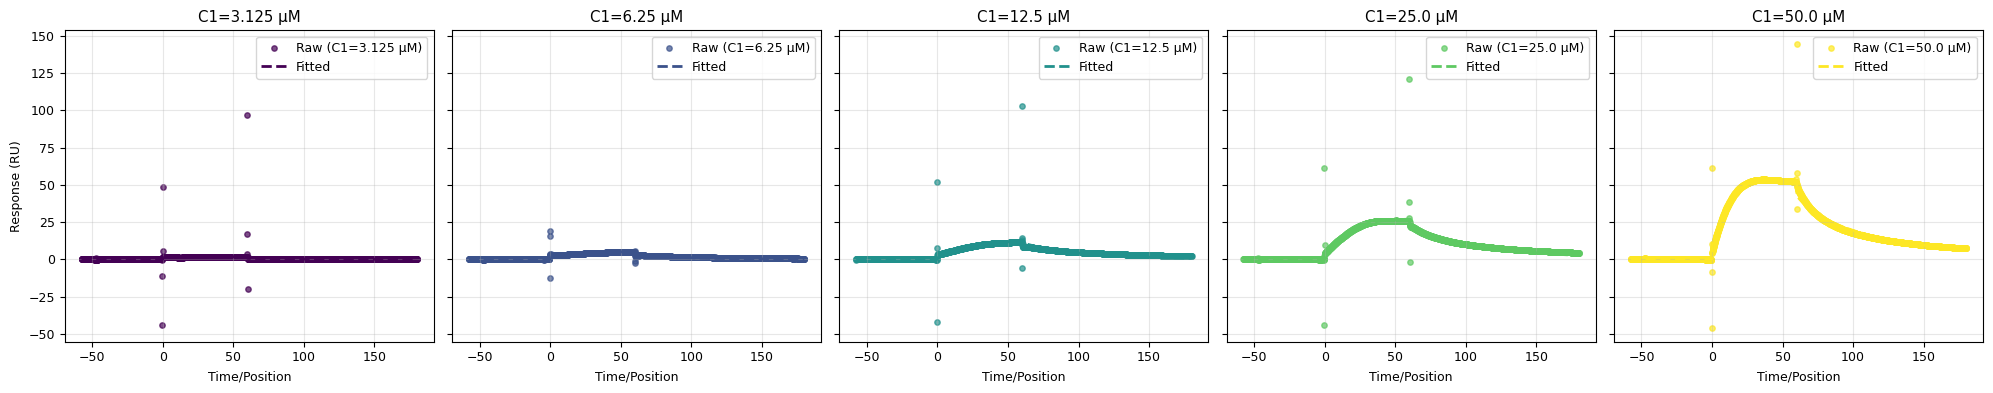

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import re

# 读取文件并处理编码问题
def read_file(filename):
    encodings = ['utf-8', 'gbk', 'latin1']  # 尝试的编码顺序
    for enc in encodings:
        try:
            with open(filename, 'r', encoding=enc) as f:
                lines = [line.strip() for line in f if line.strip()]
            return lines
        except UnicodeDecodeError:
            continue
    raise ValueError("无法解码文件，请检查文件编码")

lines = read_file('c1 0618.txt')

# 解析列名
header = lines[0].split('\t')
num_columns = len(header)
print(f"检测到总列数: {num_columns}")

# 验证列数是否合理 (应为5个浓度×4列=20列)
if num_columns != 20:
    print(f"警告：预期20列，实际检测到{num_columns}列。请检查数据格式。")

# 提取浓度信息
cycles = []
C1_values = []
for i in range(0, num_columns, 4):  # 每4列一个浓度
    col = header[i]
    match = re.search(r'Cycle: (\d+).*?C1\s+([\d.]+)', col)
    if match:
        cycles.append(int(match.group(1)))
        C1_values.append(float(match.group(2)))

# 处理数据行 - 更安全的方式
data = []
for line in lines[1:]:
    parts = line.split('\t')
    if len(parts) == num_columns:  # 只处理完整行
        try:
            row = [float(x) if x.strip() else np.nan for x in parts]
            data.append(row)
        except ValueError:
            print(f"忽略无法解析的行: {line[:50]}...")
            continue

data = np.array(data)
print(f"成功加载数据: {data.shape[0]}行 × {data.shape[1]}列")

# 组织数据结构
num_cycles = len(cycles)
cycle_data = {i: {'raw_x': [], 'raw_y': [], 'fitted_x': [], 'fitted_y': []} 
             for i in range(num_cycles)}

for i in range(num_cycles):
    raw_x_col = 4 * i
    raw_y_col = 4 * i + 1
    fitted_x_col = 4 * i + 2
    fitted_y_col = 4 * i + 3
    
    cycle_data[i]['raw_x'] = data[:, raw_x_col]
    cycle_data[i]['raw_y'] = data[:, raw_y_col]
    cycle_data[i]['fitted_x'] = data[:, fitted_x_col]
    cycle_data[i]['fitted_y'] = data[:, fitted_y_col]

# 可视化
fig, axs = plt.subplots(1, num_cycles, figsize=(20, 4), sharey=True)
if num_cycles == 1:
    axs = [axs]

colors = plt.cm.viridis(np.linspace(0, 1, num_cycles))

for i, color in enumerate(colors):
    ax = axs[i]
    cd = cycle_data[i]
    C1 = C1_values[i]
    
    # 绘制数据（跳过NaN值）
    valid = ~np.isnan(cd['raw_y'])
    ax.scatter(np.array(cd['raw_x'])[valid], np.array(cd['raw_y'])[valid],
              s=15, alpha=0.7, color=color, label=f'Raw (C1={C1} µM)')
    
    valid = ~np.isnan(cd['fitted_y'])
    ax.plot(np.array(cd['fitted_x'])[valid], np.array(cd['fitted_y'])[valid],
           '--', linewidth=2, color=color, label='Fitted')
    
    ax.set_xlabel('Time/Position')
    if i == 0:
        ax.set_ylabel('Response (RU)')
    ax.set_title(f'C1={C1} µM')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('spr_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

检测到总列数: 20
成功加载数据: 2378行 × 20列


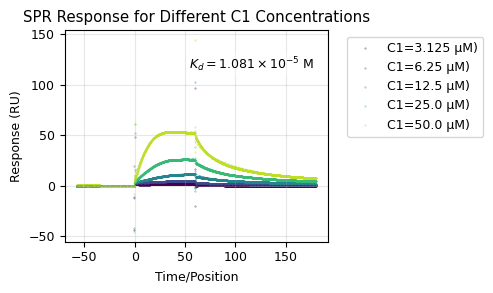

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import re

# 读取文件并处理编码问题
def read_file(filename):
    encodings = ['utf-8', 'gbk', 'latin1']  # 尝试的编码顺序
    for enc in encodings:
        try:
            with open(filename, 'r', encoding=enc) as f:
                lines = [line.strip() for line in f if line.strip()]
            return lines
        except UnicodeDecodeError:
            continue
    raise ValueError("无法解码文件，请检查文件编码")

lines = read_file('c1 0618.txt')

# 解析列名
header = lines[0].split('\t')
num_columns = len(header)
print(f"检测到总列数: {num_columns}")

# 提取浓度信息
cycles = []
C1_values = []
for i in range(0, num_columns, 4):  # 每4列一个浓度
    col = header[i]
    match = re.search(r'Cycle: (\d+).*?C1\s+([\d.]+)', col)
    if match:
        cycles.append(int(match.group(1)))
        C1_values.append(float(match.group(2)))

# 处理数据行
data = []
for line in lines[1:]:
    parts = line.split('\t')
    if len(parts) == num_columns:  # 只处理完整行
        try:
            row = [float(x) if x.strip() else np.nan for x in parts]
            data.append(row)
        except ValueError:
            print(f"忽略无法解析的行: {line[:50]}...")
            continue

data = np.array(data)
print(f"成功加载数据: {data.shape[0]}行 × {data.shape[1]}列")

# 组织数据结构
num_cycles = len(cycles)
cycle_data = {i: {'raw_x': [], 'raw_y': [], 'fitted_x': [], 'fitted_y': []} 
             for i in range(num_cycles)}

for i in range(num_cycles):
    raw_x_col = 4 * i
    raw_y_col = 4 * i + 1
    fitted_x_col = 4 * i + 2
    fitted_y_col = 4 * i + 3
    
    cycle_data[i]['raw_x'] = data[:, raw_x_col]
    cycle_data[i]['raw_y'] = data[:, raw_y_col]
    cycle_data[i]['fitted_x'] = data[:, fitted_x_col]
    cycle_data[i]['fitted_y'] = data[:, fitted_y_col]

# 创建单个图形
plt.figure(figsize=(5, 3))
colors = plt.cm.viridis(np.linspace(0, 0.9, num_cycles))
plt.rcParams.update({'font.size': 9})  # 设置全局基础字体大小

# 绘制所有数据在同一图中
for i, color in enumerate(colors):
    cd = cycle_data[i]
    C1 = C1_values[i]
    
    # 绘制原始数据（跳过NaN值）
    valid = ~np.isnan(cd['raw_y'])
    plt.scatter(np.array(cd['raw_x'])[valid], np.array(cd['raw_y'])[valid],
               s=0.1, alpha=0.7, color=color, 
               label=f'C1={C1} µM)')
    
    # 绘制拟合曲线（跳过NaN值）
    valid = ~np.isnan(cd['fitted_y'])
    plt.plot(np.array(cd['fitted_x'])[valid], np.array(cd['fitted_y'])[valid],
            '--', linewidth=0.5, color=color)
#plt.plot(np.array(cd['fitted_x'])[valid], np.array(cd['fitted_y'])[valid],
#            '--', linewidth=2, color=color,
#            label=f'Fitted (C1={C1} µM)')
# 添加图例和标签
plt.xlabel('Time/Position')
plt.ylabel('Response (RU)')
plt.title('SPR: C1 Binding to GFP-Strep-C9ORF72 Protein')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # 将图例放在图外右侧
plt.grid(True, alpha=0.3)
# 在plt.legend()之后添加以下代码
plt.text(0.95, 0.88, r'$K_d = 1.081 \times 10^{-5}$ M',  # 使用LaTeX格式
         ha='right', va='top', transform=plt.gca().transAxes,
         fontsize=9,
         bbox=dict(facecolor='white', alpha=0.3, edgecolor='none', boxstyle='round,pad=0.2'))
plt.tight_layout()
# 调整布局并保存
plt.tight_layout()
plt.savefig('spr_combined C1.png', dpi=300, bbox_inches='tight')
plt.show()

检测到总列数: 20
成功加载数据: 2378行 × 20列


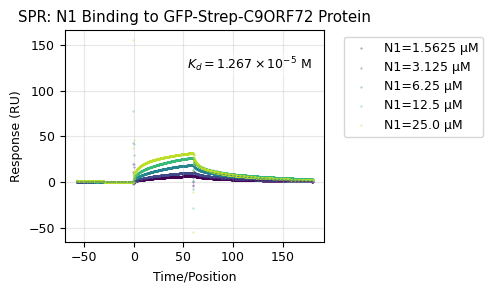

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import re

# 读取文件并处理编码问题
def read_file(filename):
    encodings = ['utf-8', 'gbk', 'latin1']  # 尝试的编码顺序
    for enc in encodings:
        try:
            with open(filename, 'r', encoding=enc) as f:
                lines = [line.strip() for line in f if line.strip()]
            return lines
        except UnicodeDecodeError:
            continue
    raise ValueError("无法解码文件，请检查文件编码")

lines = read_file('n1 0618.txt')

# 解析列名
header = lines[0].split('\t')
num_columns = len(header)
print(f"检测到总列数: {num_columns}")

# 提取浓度信息
cycles = []
N1_values = []
for i in range(0, num_columns, 4):  # 每4列一个浓度
    col = header[i]
    match = re.search(r'Cycle: (\d+).*?N1\s+([\d.]+)', col)
    if match:
        cycles.append(int(match.group(1)))
        N1_values.append(float(match.group(2)))

# 处理数据行
data = []
for line in lines[1:]:
    parts = line.split('\t')
    if len(parts) == num_columns:  # 只处理完整行
        try:
            row = [float(x) if x.strip() else np.nan for x in parts]
            data.append(row)
        except ValueError:
            print(f"忽略无法解析的行: {line[:50]}...")
            continue

data = np.array(data)
print(f"成功加载数据: {data.shape[0]}行 × {data.shape[1]}列")

# 组织数据结构
num_cycles = len(cycles)
cycle_data = {i: {'raw_x': [], 'raw_y': [], 'fitted_x': [], 'fitted_y': []} 
             for i in range(num_cycles)}

for i in range(num_cycles):
    raw_x_col = 4 * i
    raw_y_col = 4 * i + 1
    fitted_x_col = 4 * i + 2
    fitted_y_col = 4 * i + 3
    
    cycle_data[i]['raw_x'] = data[:, raw_x_col]
    cycle_data[i]['raw_y'] = data[:, raw_y_col]
    cycle_data[i]['fitted_x'] = data[:, fitted_x_col]
    cycle_data[i]['fitted_y'] = data[:, fitted_y_col]

# 创建单个图形
plt.figure(figsize=(5, 3))
colors = plt.cm.viridis(np.linspace(0, 0.9, num_cycles))
plt.rcParams.update({'font.size': 9})  # 设置全局基础字体大小

# 绘制所有数据在同一图中
for i, color in enumerate(colors):
    cd = cycle_data[i]
    N1 = N1_values[i]
    
    # 绘制原始数据（跳过NaN值）
    valid = ~np.isnan(cd['raw_y'])
    plt.scatter(np.array(cd['raw_x'])[valid], np.array(cd['raw_y'])[valid],
               s=0.1, alpha=0.7, color=color, 
               label=f'N1={N1} µM')
    
    # 绘制拟合曲线（跳过NaN值）
    valid = ~np.isnan(cd['fitted_y'])
    plt.plot(np.array(cd['fitted_x'])[valid], np.array(cd['fitted_y'])[valid],
            '--', linewidth=0.5, color=color)
#plt.plot(np.array(cd['fitted_x'])[valid], np.array(cd['fitted_y'])[valid],
#            '--', linewidth=2, color=color,
#            label=f'Fitted (C1={C1} µM)')
# 添加图例和标签
plt.xlabel('Time/Position')
plt.ylabel('Response (RU)')
plt.title('SPR: N1 Binding to GFP-Strep-C9ORF72 Protein')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # 将图例放在图外右侧
plt.grid(True, alpha=0.3)
# 在plt.legend()之后添加以下代码
plt.text(0.95, 0.88, r'$K_d = 1.267 \times 10^{-5}$ M',  # 使用LaTeX格式
         ha='right', va='top', transform=plt.gca().transAxes,
         fontsize=9,
         bbox=dict(facecolor='white', alpha=0.3, edgecolor='none', boxstyle='round,pad=0.2'))
plt.tight_layout()
# 调整布局并保存
plt.tight_layout()
plt.savefig('spr_combined N1.png', dpi=300, bbox_inches='tight')
plt.show()

Bicore analysis

In [14]:
os.chdir(r"E:\2025-QXF总文件夹\2025结果汇总\2025-06 原始数据\20250625 Bicore 32")      
os.getcwd()

'E:\\2025-QXF总文件夹\\2025结果汇总\\2025-06 原始数据\\20250625 Bicore 32'

期刊级SPR图表已保存为: spr_protein_interaction_journal.tiff/pdf/png


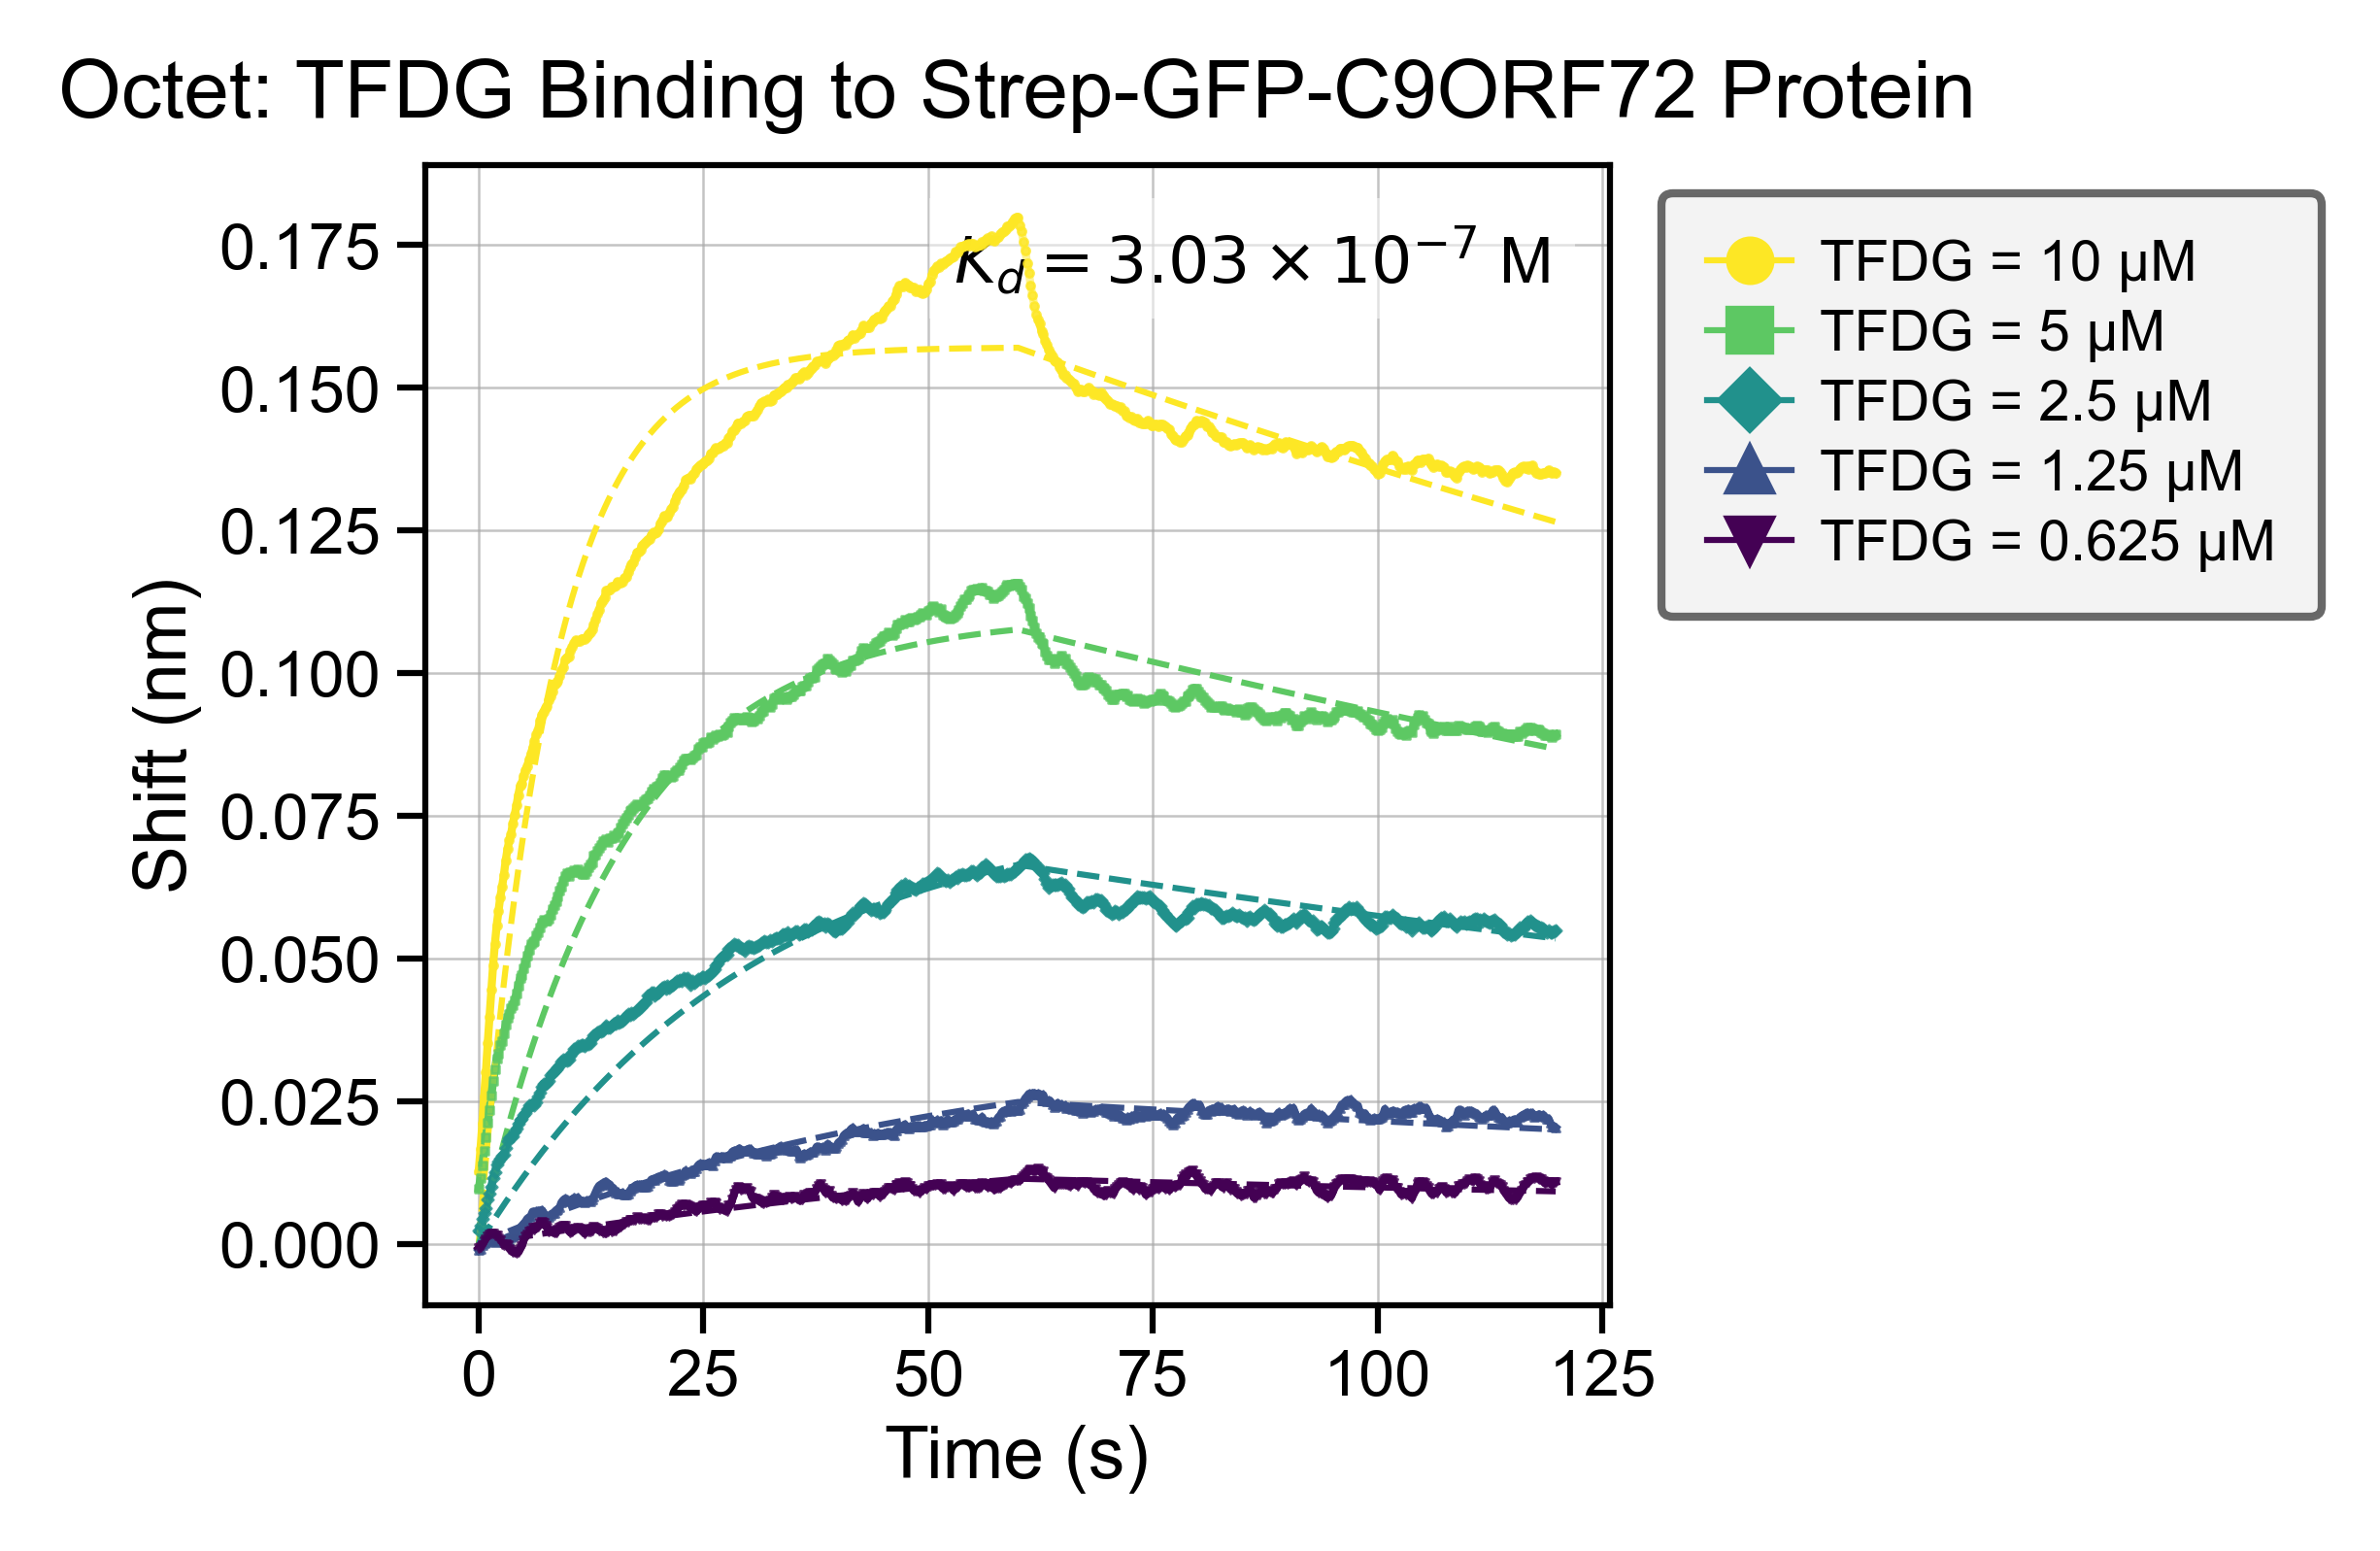

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('data_32.csv')    

# 设置期刊级绘图参数
plt.rcParams.update({
    'font.family': 'Arial',        # 使用Arial字体
    'font.size': 8,                # 基础字号
    'axes.linewidth': 0.75,         # 轴线宽度
    'axes.edgecolor': 'black',     # 明确设置轴线为黑色
    'lines.linewidth': 0.75,          # 线条宽度
    'xtick.major.width': 0.75,      # X轴刻度宽度
    'ytick.major.width': 0.75,      # Y轴刻度宽度
    'xtick.major.size': 3.5,       # X轴刻度长度
    'ytick.major.size': 3.5,       # Y轴刻度长度
    'xtick.color': 'black',        # X轴刻度颜色为黑色
    'ytick.color': 'black',        # Y轴刻度颜色为黑色
    'legend.frameon': True,        # 启用图例框
    'legend.framealpha': 0.8,      # 图例框透明度
    'legend.edgecolor': '#444444', # 图例框边框颜色（深灰色）
    'legend.facecolor': '#f0f0f0', # 图例框背景颜色（浅灰色）
    'legend.fontsize': 7,          # 图例字号
    'axes.labelsize': 9,           # 轴标签字号
    'axes.titlesize': 10,          # 标题字号
    'figure.dpi': 600,             # 输出分辨率
    'savefig.dpi': 600,            # 保存分辨率
    'figure.autolayout': True      # 自动布局
})

# 创建图形和轴对象 - 单栏尺寸 (90mm x 67.5mm)
fig, ax = plt.subplots(figsize=(4, 2.5))

# 定义期刊级配色方案
colors = [
   "#FDE725" , "#5DC863" ,"#21918C",  "#3B528B","#440154"# Viridis调色板（深到浅）
]

# 自定义标记样式
markers = ['o', 's', 'D', '^', 'v']

# 数据处理（假设df是您之前加载的DataFrame）
# 只处理前5个条件
for i in range(1, 6):
    time_col = f'Time{i}'
    data_col = f'Data{i}'
    fit_col = f'Fit{i}'
    
    # 绘制原始数据点（使用散点）
    ax.scatter(
        df[time_col], 
        df[data_col],
        s=1,  # 点大小
        color=colors[i-1],
        marker=markers[i-1],
        alpha=0.8,
        edgecolor=None,
        linewidth=0.3,
        zorder=4  # 确保点在线上方
    )
    
    # 绘制原始数据线（正常处理，不做平滑）
    # 移除NaN值
    valid_mask = ~df[data_col].isna()
    x_data = df.loc[valid_mask, time_col]
    y_data = df.loc[valid_mask, data_col]
    
    # 排序
    sorted_idx = np.argsort(x_data)
    x_sorted = x_data.iloc[sorted_idx].values
    y_sorted = y_data.iloc[sorted_idx].values
    
    # 绘制原始数据线（实线）
    ax.plot(
        x_sorted,
        y_sorted,
        color=colors[i-1],
        linestyle='-',
        linewidth=1,
        zorder=2
    )
    
    # 绘制拟合曲线（使用虚线）
    # 移除NaN值
    valid_mask = ~df[fit_col].isna()
    x_fit = df.loc[valid_mask, time_col]
    y_fit = df.loc[valid_mask, fit_col]
    
    # 排序
    sorted_idx = np.argsort(x_fit)
    x_fit_sorted = x_fit.iloc[sorted_idx].values
    y_fit_sorted = y_fit.iloc[sorted_idx].values
    
    # 绘制拟合曲线（虚线）
    ax.plot(
        x_fit_sorted,
        y_fit_sorted,
        color=colors[i-1],
        linestyle='--',  # 虚线
        linewidth=0.75,
        zorder=3
    )

# 设置轴标签和范围
ax.set_xlabel('Time (s)', fontsize=9, labelpad=2)
ax.set_ylabel('Shift (nm)', fontsize=9, labelpad=2)

# 设置刻度参数
ax.tick_params(axis='both', which='major', labelsize=8, pad=2)

# 添加图例（优化位置和样式）
legend_labels = [f'TFDG = {conc} μM' for conc in [10, 5, 2.5, 1.25, 0.625]]
legend_handles = []
for i in range(5):
    # 创建包含点和线的图例句柄
    handle = plt.Line2D([0], [0], 
                        marker=markers[i], 
                        color=colors[i], 
                        linestyle='-',
                        markersize=5,
                        label=legend_labels[i])
    legend_handles.append(handle)

ax.legend(handles=legend_handles, 
          loc='upper left', 
          bbox_to_anchor=(1.02, 1),
          frameon=True, 
          handletextpad=0.5,
          handlelength=1.5,
          borderpad=0.8,
          labelspacing=0.3)

# 添加实线网格（灰色）
ax.grid(True, linestyle='-', linewidth=0.3, color='#aaaaaa', alpha=0.7)

# 添加科学注释（Kd值）
ax.text(0.95, 0.95, r'$K_d = 3.03 \times 10^{-7}$ M',
        transform=ax.transAxes,
        fontsize=8,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(facecolor='white', alpha=0.5, pad=3, edgecolor='none'))

# 设置刻度字体
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontname('Arial')
    label.set_fontsize(8)

# 优化布局
plt.tight_layout(pad=1.0)
plt.title('Octet: TFDG Binding to Strep-GFP-C9ORF72 Protein')
# 保存多种期刊要求的格式
for ext in ['tiff', 'pdf', 'png']:
    plt.savefig(f'spr_protein_interaction_journal.{ext}', dpi=600, bbox_inches='tight')

print("期刊级SPR图表已保存为: spr_protein_interaction_journal.tiff/pdf/png")

SPR C9ORF72 with LC3B 20250730  analysis

检测到总列数: 24
检测到浓度值: [0.0625, 0.125, 0.25, 0.5, 1.0, 2.0] µg/ml
成功加载数据: 4378行 × 24列
图表已保存为 'spr_combined_LC3B.tiff'


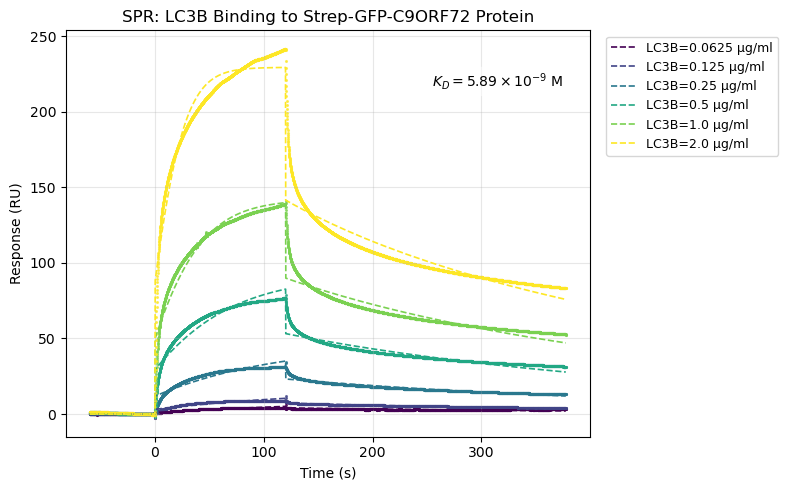

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import re

# 读取文件并处理编码问题
def read_file(filename):
    encodings = ['utf-8', 'gbk', 'latin1']  # 尝试的编码顺序
    for enc in encodings:
        try:
            with open(filename, 'r', encoding=enc) as f:
                lines = [line.strip() for line in f if line.strip()]
            return lines
        except UnicodeDecodeError:
            continue
    raise ValueError("无法解码文件，请检查文件编码")

lines = read_file('STREP-GFP-C9-LC3B2.txt')

# 解析列名
header = lines[0].split('\t')
num_columns = len(header)
print(f"检测到总列数: {num_columns}")

# 提取浓度信息
concentrations = []
for i in range(0, num_columns, 4):  # 每4列一个浓度
    col = header[i]
    # 匹配浓度值（例如：0.0625 µg/ml）
    match = re.search(r'([\d.]+)\s礸/ml', col)
    if match:
        concentrations.append(float(match.group(1)))
    else:
        # 尝试其他可能的格式（例如：0.0625 µg）
        match = re.search(r'([\d.]+)\s*0.0625 礸/ml_X', col)
        if match:
            concentrations.append(float(match.group(1)))
        else:
            print(f"警告: 无法从列名解析浓度: {col}")
            concentrations.append(0.0)  # 添加默认值

print(f"检测到浓度值: {concentrations} µg/ml")

# 处理数据行
data = []
for line in lines[1:]:
    parts = line.split('\t')
    if len(parts) == num_columns:  # 只处理完整行
        try:
            row = [float(x) if x.strip() else np.nan for x in parts]
            data.append(row)
        except ValueError:
            print(f"忽略无法解析的行: {line[:50]}...")
            continue

data = np.array(data)
print(f"成功加载数据: {data.shape[0]}行 × {data.shape[1]}列")

# 组织数据结构
num_conc = len(concentrations)
conc_data = {i: {'raw_x': [], 'raw_y': [], 'fitted_x': [], 'fitted_y': []} 
             for i in range(num_conc)}

for i in range(num_conc):
    raw_x_col = 4 * i
    raw_y_col = 4 * i + 1
    fitted_x_col = 4 * i + 2
    fitted_y_col = 4 * i + 3
    
    conc_data[i]['raw_x'] = data[:, raw_x_col]
    conc_data[i]['raw_y'] = data[:, raw_y_col]
    conc_data[i]['fitted_x'] = data[:, fitted_x_col]
    conc_data[i]['fitted_y'] = data[:, fitted_y_col]

# 创建单个图形
plt.figure(figsize=(8, 5))
colors = plt.cm.viridis(np.linspace(0, 1, num_conc))
plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 10,
    'axes.titlesize': 12,
    'legend.fontsize': 9
})

# 绘制所有数据在同一图中
for i, color in enumerate(colors):
    cd = conc_data[i]
    conc = concentrations[i]
    
    # 绘制原始数据（跳过NaN值）
    valid = ~np.isnan(cd['raw_y'])
    plt.scatter(np.array(cd['raw_x'])[valid], np.array(cd['raw_y'])[valid],
               s=1.5, alpha=0.7, color=color)
    
    # 绘制拟合曲线（跳过NaN值）
    valid = ~np.isnan(cd['fitted_y'])
    plt.plot(np.array(cd['fitted_x'])[valid], np.array(cd['fitted_y'])[valid],
            '--', linewidth=1.2, color=color, 
            label=f'LC3B={conc} µg/ml')

# 添加图例和标签
plt.xlabel('Time (s)')
plt.ylabel('Response (RU)')
plt.title('SPR: LC3B Binding to Strep-GFP-C9ORF72 Protein')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')  # 将图例放在图外右侧
plt.grid(True, alpha=0.3)
#plt.ylim(0, 300)
# 添加Kd值注释（示例值，需要根据实际分析结果更新）
plt.text(0.95, 0.90, r'$K_d = 5.89 \times 10^{-9}$ M', 
         ha='right', va='top', transform=plt.gca().transAxes,
         fontsize=10,
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))

plt.tight_layout()

# 保存TIFF
plt.savefig('spr_combined_LC3B.tiff',
           format='tiff',
           dpi=600,
           bbox_inches='tight',
           pil_kwargs={'compression': 'tiff_lzw'})

print("图表已保存为 'spr_combined_LC3B.tiff'")

检测到总列数: 28
使用浓度值: [0.0625, 0.125, 0.25, 0.5, 1, 2, 4] µg/ml
成功加载数据: 4307行 × 28列
选择的浓度索引: [1, 2, 3, 4, 5]
选择的浓度: [0.125, 0.25, 0.5, 1, 2]
图表已保存为 'spr_selected_LC3B.tiff'


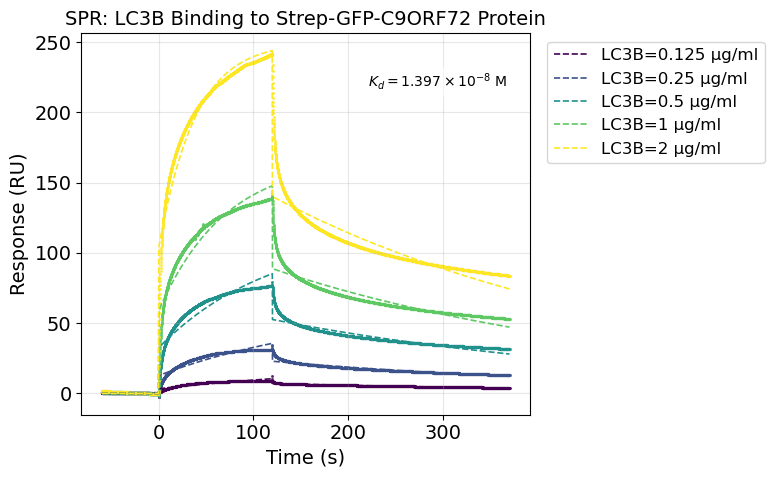

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import re

# 读取文件并处理编码问题
def read_file(filename):
    encodings = ['utf-8', 'gbk', 'latin1']  # 尝试的编码顺序
    for enc in encodings:
        try:
            with open(filename, 'r', encoding=enc) as f:
                lines = [line.strip() for line in f if line.strip()]
            return lines
        except UnicodeDecodeError:
            continue
    raise ValueError("无法解码文件，请检查文件编码")

lines = read_file('STREP-GFP-C9-LC3B.txt')

# 解析列名
header = lines[0].split('\t')
num_columns = len(header)
print(f"检测到总列数: {num_columns}")

# 手动设置已知的浓度值（根据文件结构）
concentrations = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4]
print(f"使用浓度值: {concentrations} µg/ml")

# 处理数据行
data = []
for line in lines[1:]:
    parts = line.split('\t')
    if len(parts) == num_columns:  # 只处理完整行
        try:
            row = [float(x) if x.strip() else np.nan for x in parts]
            data.append(row)
        except ValueError:
            print(f"忽略无法解析的行: {line[:50]}...")
            continue

data = np.array(data)
print(f"成功加载数据: {data.shape[0]}行 × {data.shape[1]}列")

# 组织数据结构
num_conc = len(concentrations)
conc_data = {i: {'raw_x': [], 'raw_y': [], 'fitted_x': [], 'fitted_y': []} 
             for i in range(num_conc)}

for i in range(num_conc):
    raw_x_col = 4 * i
    raw_y_col = 4 * i + 1
    fitted_x_col = 4 * i + 2
    fitted_y_col = 4 * i + 3
    
    conc_data[i]['raw_x'] = data[:, raw_x_col]
    conc_data[i]['raw_y'] = data[:, raw_y_col]
    conc_data[i]['fitted_x'] = data[:, fitted_x_col]
    conc_data[i]['fitted_y'] = data[:, fitted_y_col]

# 选择特定的浓度
selected_concentrations = [0.125, 0.25, 0.5, 1, 2]
selected_indices = [i for i, conc in enumerate(concentrations) if conc in selected_concentrations]

print(f"选择的浓度索引: {selected_indices}")
print(f"选择的浓度: {[concentrations[i] for i in selected_indices]}")

# 创建单个图形
plt.figure(figsize=(8, 5))
colors = plt.cm.viridis(np.linspace(0, 1, len(selected_indices)))
plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'legend.fontsize': 12
})

# 绘制选定的数据
for idx, color in zip(selected_indices, colors):
    cd = conc_data[idx]
    conc = concentrations[idx]
    
    # 绘制原始数据（跳过NaN值）
    valid = ~np.isnan(cd['raw_y'])
    plt.scatter(np.array(cd['raw_x'])[valid], np.array(cd['raw_y'])[valid],
               s=1.5, alpha=0.7, color=color)
    
    # 绘制拟合曲线（跳过NaN值）
    valid = ~np.isnan(cd['fitted_y'])
    plt.plot(np.array(cd['fitted_x'])[valid], np.array(cd['fitted_y'])[valid],
            '--', linewidth=1.2, color=color, 
            label=f'LC3B={conc} µg/ml')

# 添加图例和标签
plt.xlabel('Time (s)')
plt.ylabel('Response (RU)')
plt.title('SPR: LC3B Binding to Strep-GFP-C9ORF72 Protein')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')  # 将图例放在图外右侧
plt.grid(True, alpha=0.3)

# 添加Kd值注释（示例值，需要根据实际分析结果更新）
plt.text(0.95, 0.90, r'$K_d = 1.397 \times 10^{-8}$ M', 
         ha='right', va='top', transform=plt.gca().transAxes,
         fontsize=10,
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))

plt.tight_layout()

# 保存TIFF
plt.savefig('spr_selected_LC3B.tiff',
           format='tiff',
           dpi=600,
           bbox_inches='tight',
           pil_kwargs={'compression': 'tiff_lzw'})

print("图表已保存为 'spr_selected_LC3B.tiff'")